<a href="https://colab.research.google.com/github/Vineet3006/Data_Science/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#Importing libraries
import ast
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('train.csv')

In [ ]:
data.head(5)

In [ ]:
data.shape

(3000, 23)

In [6]:
data.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [57]:
#Droping columns

data = data.drop(["homepage", "imdb_id", "original_title","poster_path", "status", "Keywords", "spoken_languages", "tagline", "title"], axis=1)

In [6]:
len(data.columns)

14

In [ ]:
data.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
original_language         object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
runtime                  float64
cast                      object
crew                      object
revenue                    int64
dtype: object

In [ ]:
data.shape

(3000, 14)

In [8]:
#Checking missing values

data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
original_language           0
overview                    8
popularity                  0
production_companies      156
production_countries       55
release_date                0
runtime                     2
cast                       13
crew                       16
revenue                     0
dtype: int64

In [58]:
#Droping belongs_to_collection column

data = data.drop(["belongs_to_collection"], axis=1)

In [59]:
# droping data with null values  

data = data.dropna() 
  
data = data.reset_index(drop = True) 

In [ ]:
data.shape

(2812, 13)

In [60]:
#changing to datetime data type 

data ["release_date"] = pd.to_datetime(data ["release_date"], errors='coerce')

In [61]:
data['year'] = data['release_date'].dt.year

In [ ]:
data.dtypes

In [62]:
#using ast to convert dict in string to dict only

import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))
data["production_companies"] = data["production_companies"].map(lambda x: ast.literal_eval(x))
data["production_countries"] = data["production_countries"] .map(lambda x: ast.literal_eval(x))

In [63]:
#function to get column details

def get_details(x, y):
    dt = []
    st = " "
    for i in x:
      dt.append(i.get(y))

    if dt == []:
      return st
    else:
        return (st.join(dt))

In [64]:
#getting column details in the list

data["genres_list"] = data["genres"].map(lambda x: get_details(x, "name"))
data['cast_list'] = data['cast'].map(lambda x: get_details(x, "name"))
data['crew_list'] = data['crew'].map(lambda x: get_details(x, "name"))
data["production_companies_list"] = data["production_companies"].map(lambda x: get_details(x, "name"))
data["production_countries_list"] = data["production_countries"] .map(lambda x: get_details(x, "name"))

In [15]:
data['genres_list'].head(2)

0                         Comedy
1    Comedy Drama Family Romance
Name: genres_list, dtype: object

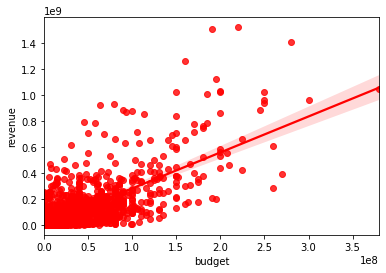

In [16]:
# relationship between Budget and Revenue

sns.regplot(x="budget", y="revenue", data=data, color = 'red')

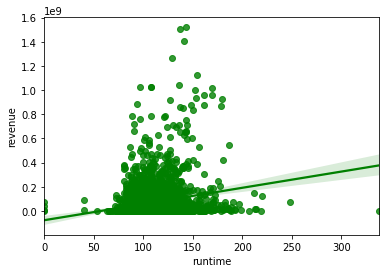

In [ ]:
# relationship between Runtime and Revenue

sns.regplot(x="runtime", y="revenue", data=data, color = 'green')

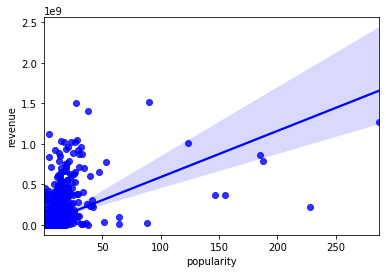

In [ ]:
# relationship between Revenue and Popularity

sns.regplot(x="popularity", y="revenue", data=data, color = 'blue')

In [65]:
#Droping columns with dict as already converted into list

data = data.drop(["genres", "cast", "crew", "production_companies", "production_countries"], axis=1)


In [66]:
data = data.drop(["release_date"], axis=1)

In [67]:
#selecting columns for normalization

data1 = data [["budget","popularity","runtime", "year", "revenue"]]

In [68]:
from sklearn.preprocessing import StandardScaler
Scalar = StandardScaler()

In [69]:
data1 = Scalar.fit_transform(data1)

In [70]:
data1.shape

(2812, 5)

In [71]:
#converted ndarray to dataframe

new_data = pd.DataFrame(data1, columns = ['budget','popularity','runtime', 'year','revenue'])

In [72]:
new_data.head(2)

,budget,popularity,runtime,year,revenue
0,-0.254473,-0.194740,-0.724451,0.604470,-0.413143
1,0.443369,-0.043549,0.217456,-0.072557,0.186939


In [24]:
new_data.shape

(2812, 5)

In [73]:
#data for text columns

data2 = data [["original_language","overview","genres_list", "cast_list", "crew_list", "production_companies_list", "production_countries_list"]]

In [74]:
#combine all text columns

data2["final_text"] = data2["original_language"]+" "+ data2["overview"]+ " "+data2["genres_list"]+ " "+data2["cast_list"] +" "+ data2["crew_list"] + " "+ data2["production_companies_list"] + " "+ data2["production_countries_list"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
import nltk
from nltk.corpus import stopwords
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
#TF-IDF Vectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')

features = vectorizer.fit_transform(data2['final_text'])

In [81]:
dtm = features.toarray()

In [82]:
new_data2 = pd.DataFrame(data=dtm[:,1:])

In [83]:
new_data2.shape

(2812, 58981)

In [84]:
#joining two our data

main_data = pd.concat([new_data,new_data2], axis=1)

In [85]:
main_data.shape

(2812, 58986)

In [86]:
#independent and target variables

X = main_data.drop(["revenue"], axis=1)
y = main_data["revenue"]

In [87]:
#test/train split

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state = 0, shuffle = True)


In [88]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [89]:
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    5     6     7 ... 58982 58983 58984] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectPercentile(percentile=10,
                 score_func=<function f_classif at 0x7fae3668a6a8>)

In [90]:
X_train_transformed = selector.transform(X_train)

In [91]:
X_test_transformed  = selector.transform(X_test)

In [92]:
X_train_transformed.shape

(2249, 5898)

In [93]:
X_test_transformed.shape

(563, 5898)

In [94]:
#importing keras

import keras
import keras.backend as kb
import tensorflow as tf

In [108]:
#model creation

# Initializing the ANN
model = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
model.add(tf.keras.layers.Dense(units=1, activation='relu'))


In [109]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

# Training the ANN on the Training set
hist =model.fit(X_train_transformed, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
71/71 [==============================] - 1s 3ms/step - loss: 1.1294 - mse: 1.1294
Epoch 2/50
71/71 [==============================] - 0s 3ms/step - loss: 1.0930 - mse: 1.0930
Epoch 3/50
71/71 [==============================] - 0s 3ms/step - loss: 1.1079 - mse: 1.1079
Epoch 4/50
71/71 [==============================] - 0s 3ms/step - loss: 0.7681 - mse: 0.7681
Epoch 5/50
71/71 [==============================] - 0s 3ms/step - loss: 0.9409 - mse: 0.9409
Epoch 6/50
71/71 [==============================] - 0s 3ms/step - loss: 1.1455 - mse: 1.1455
Epoch 7/50
71/71 [==============================] - 0s 3ms/step - loss: 1.0161 - mse: 1.0161
Epoch 8/50
71/71 [==============================] - 0s 3ms/step - loss: 0.7286 - mse: 0.7286
Epoch 9/50
71/71 [==============================] - 0s 4ms/step - loss: 0.6138 - mse: 0.6138
Epoch 10/50
71/71 [==============================] - 0s 3ms/step - loss: 0.6165 - mse: 0.6165
Epoch 11/50
71/71 [==============================] - 0s 3ms/step - lo

In [105]:
#